# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# this will help in making python code more structured automatically ( good coding practice)
#%load_ext nb_black

# libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression model
from sklearn.linear_model import LinearRegression

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
# mount google drive for colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python course/used_device_data.csv')


## Data Overview

### Observations


In [ ]:
#viewing first 5 rows of the data
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#viewing last 5 rows of the data
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
# Checking the shape of Dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 3454 rows and 15 columns


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
# use describe() to see a numerical statistical summary of the data
df.describe(include="all")

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454,3454,3454.000000,3454,3454,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
unique,34,4,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Others,Android,NaN,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,502,3214,NaN,2335,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.713115,NaN,NaN,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,NaN,NaN,3.805280,NaN,NaN,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,NaN,NaN,5.080000,NaN,NaN,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,NaN,NaN,12.700000,NaN,NaN,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,NaN,NaN,12.830000,NaN,NaN,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,NaN,NaN,15.340000,NaN,NaN,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718


### Sanity checks

In [ ]:
# checking missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# checking duplicate values
df.duplicated().sum()

0

In [ ]:
# creating copy of a dataset
df1 = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# function to plot hiostogram and boxplot at same time
def histogram_boxplot(data, feature, figsize=(10,7), kde = False, bins=None):
  """
  Histogram and boxplot combined
  data: dataframe
  feature: dataframe column
  figsize: size of figure by default(10,7)
  kde: whether to show kernal density curve or not ( by default False)
  bins: Number of bins by defalut None
  """
  f2, (ax_box2,ax_hist2) = plt.subplots(
      nrows=2, # number of sulplot rows=2
      sharex=True, # x-axis will be shared among all the grids
      gridspec_kw={"height_ratios":(0.25,0.75)},
      figsize=figsize,
  ) # creating 2 subplots
  sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans = True, color= "violet"
  )# creating box plot and a triangle will indicate the mean value of the column
  sns.histplot(data=data, x=feature, ax=ax_hist2, kde=kde, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, ax=ax_hist2, kde=kde
  ) # For histogram
  ax_hist2.axvline(
      data[feature].mean(), color="green",linestyle= "--"
  )# Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(), color="green",linestyle= "-"
  )# Add median to the histogram

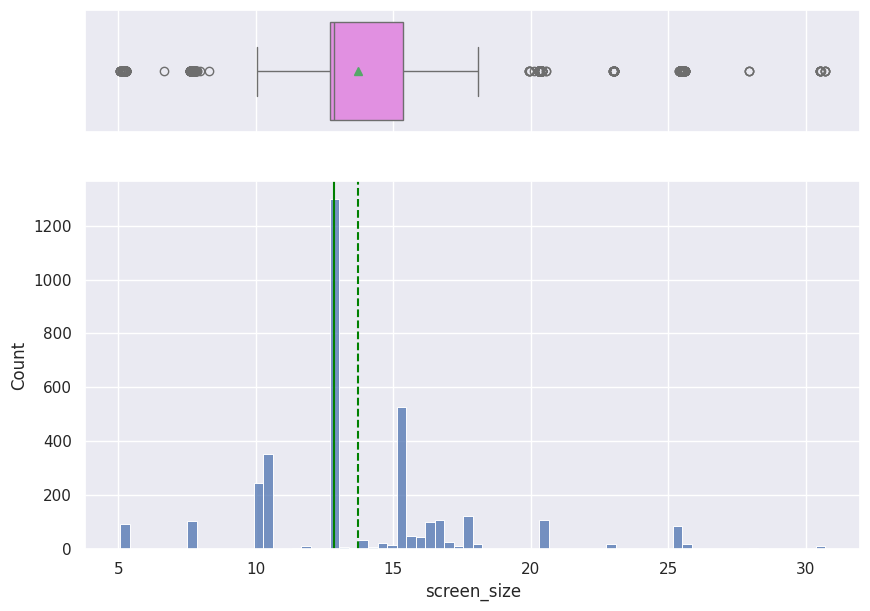

In [ ]:
histogram_boxplot(df, "screen_size")

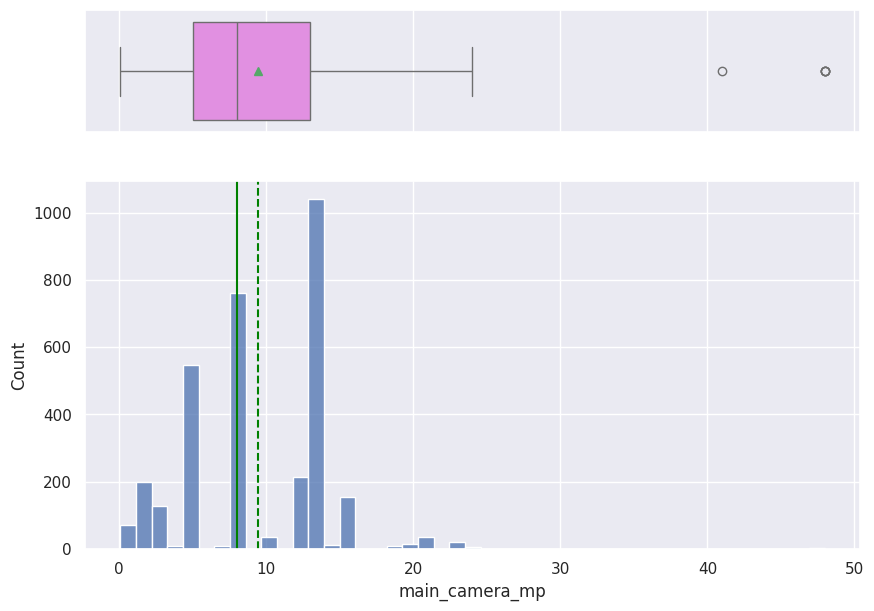

In [ ]:
histogram_boxplot(df, "main_camera_mp")

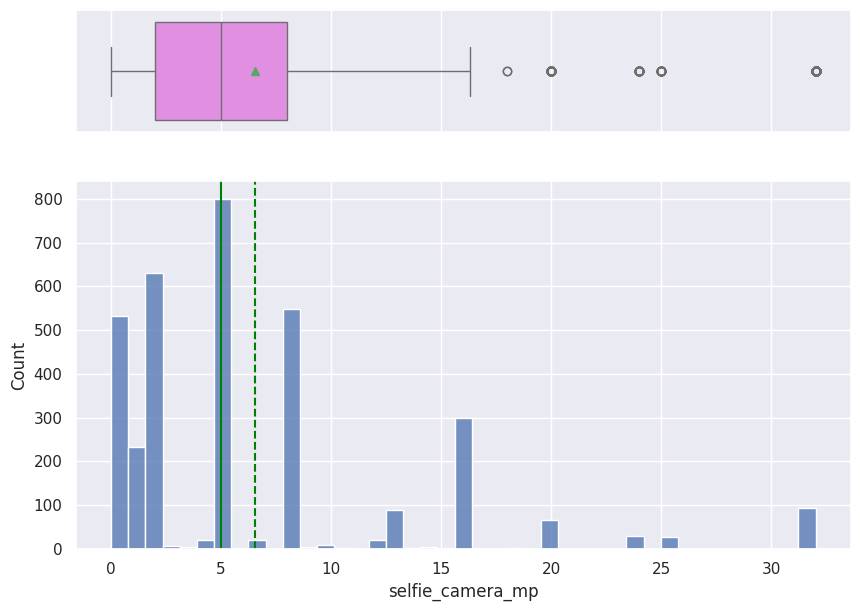

In [ ]:
histogram_boxplot(df, "selfie_camera_mp")

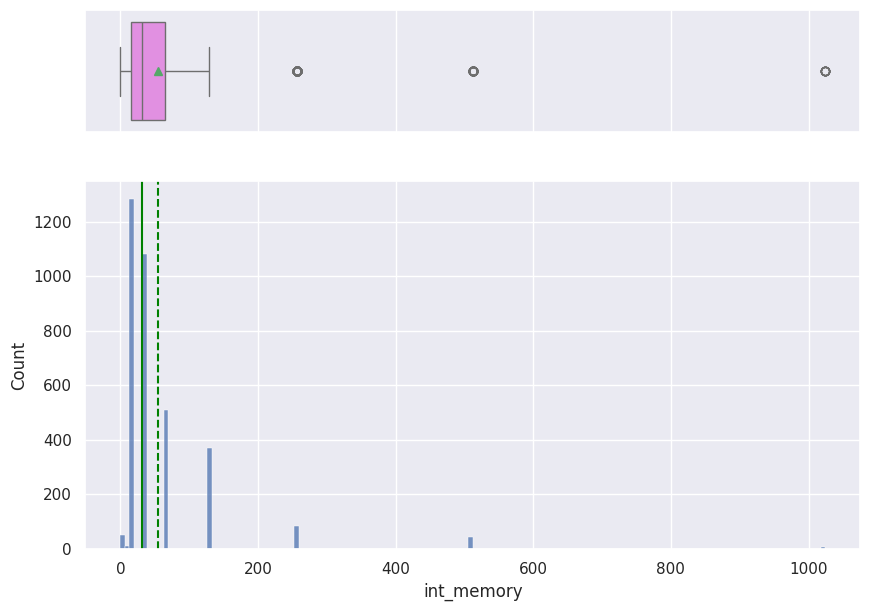

In [ ]:
histogram_boxplot(df, "int_memory")

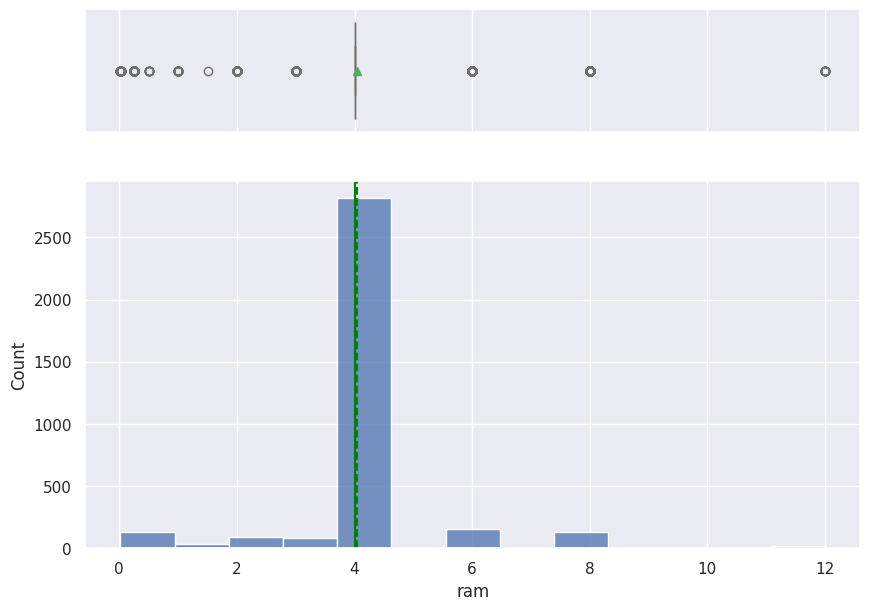

In [ ]:
histogram_boxplot(df, "ram")

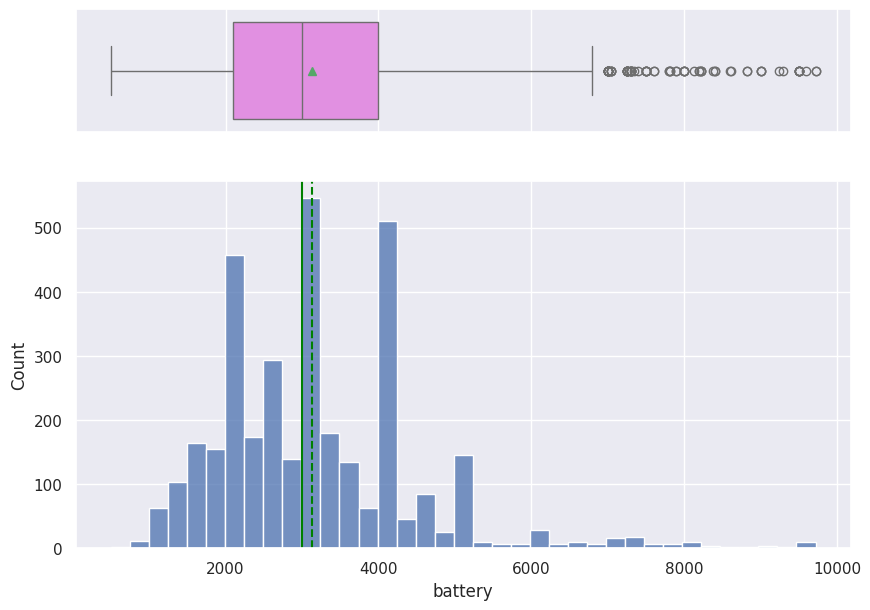

In [ ]:
histogram_boxplot(df, "battery")

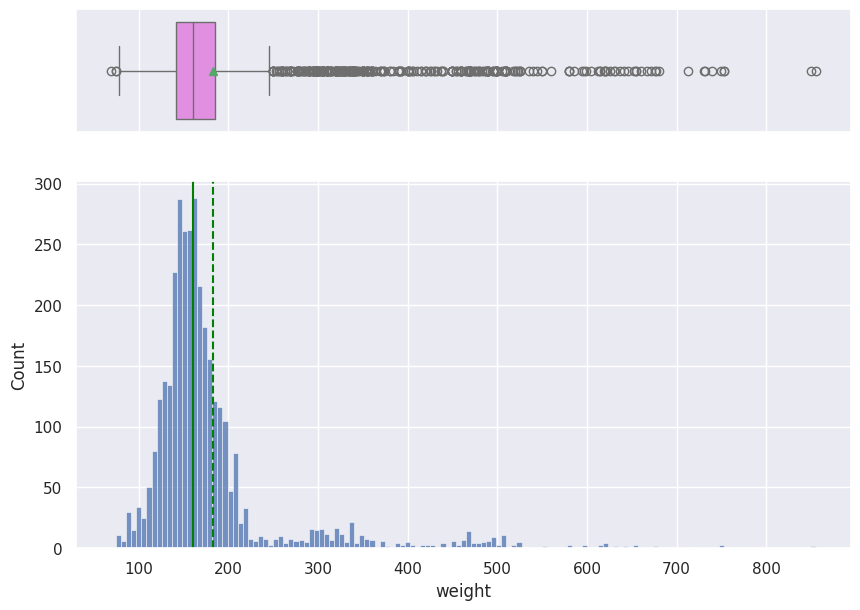

In [ ]:
histogram_boxplot(df, "weight")

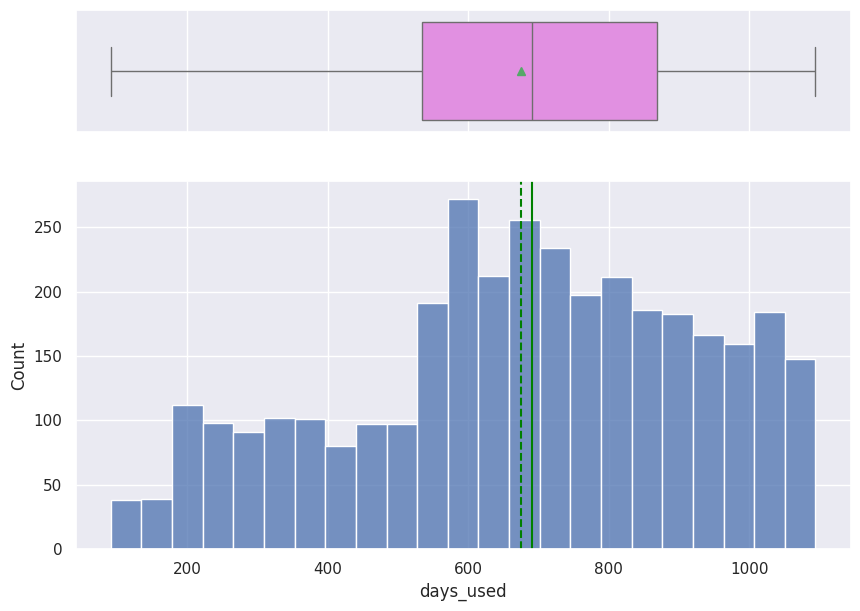

In [ ]:
histogram_boxplot(df, "days_used")

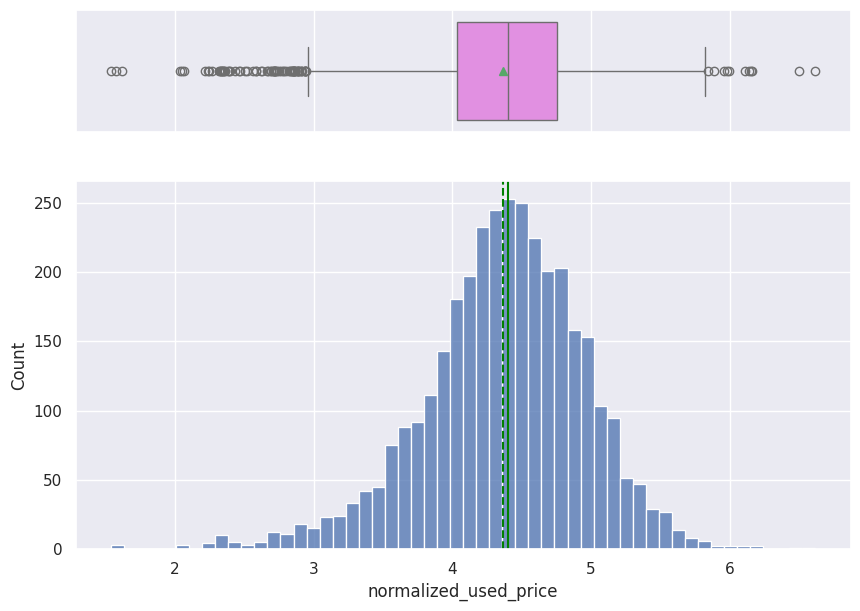

In [ ]:
histogram_boxplot(df, "normalized_used_price")

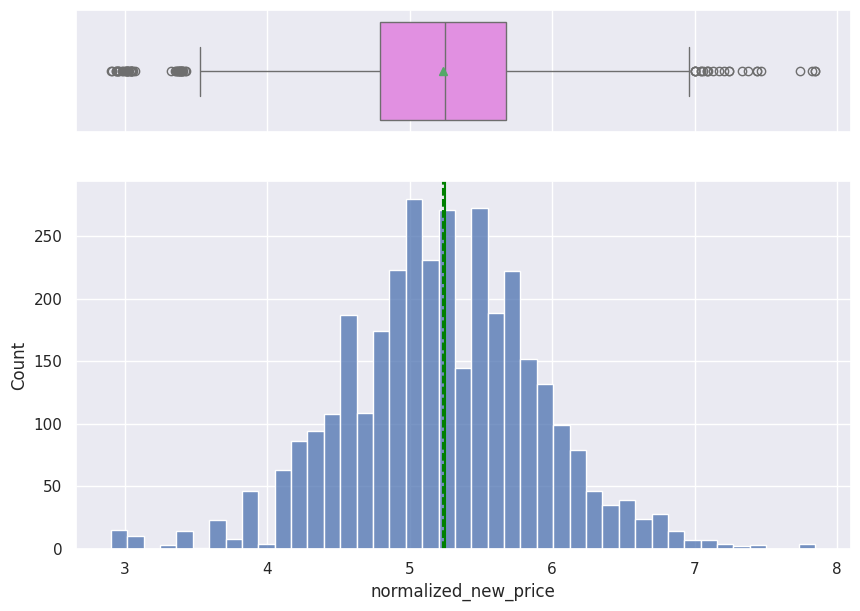

In [ ]:
histogram_boxplot(df, "normalized_new_price")

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


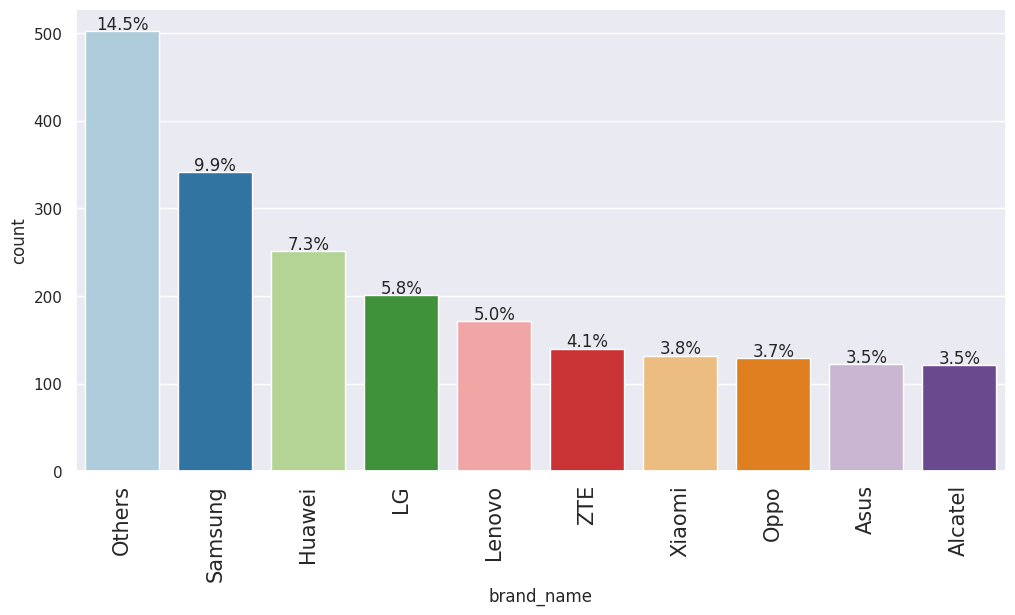

In [ ]:
labeled_barplot(df,"brand_name", perc=True,n=10)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


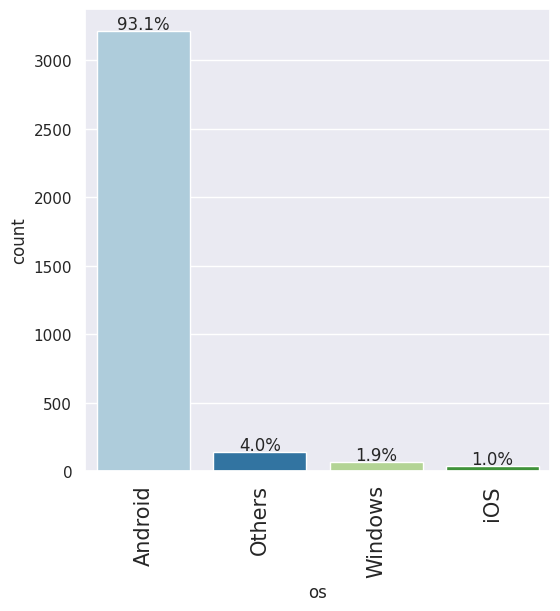

In [ ]:
labeled_barplot(df,"os", perc=True)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


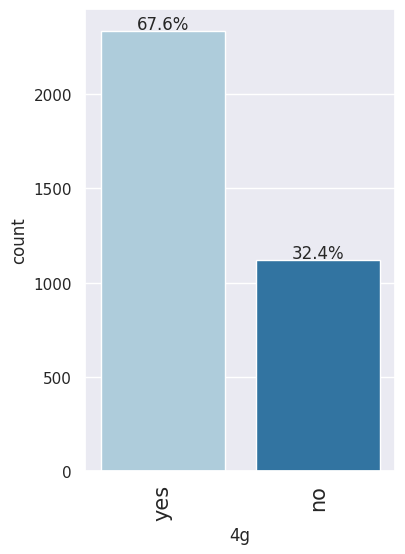

In [ ]:
labeled_barplot(df,"4g", perc=True)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


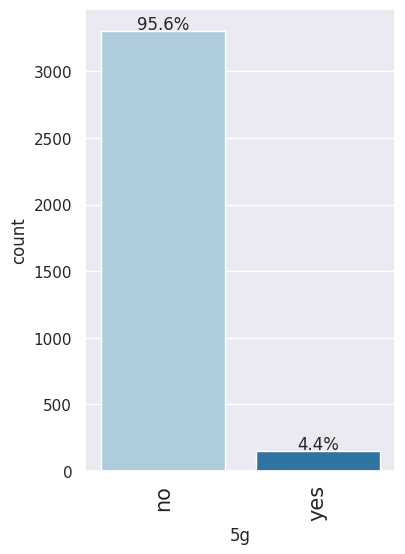

In [ ]:
labeled_barplot(df,"5g", perc=True)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


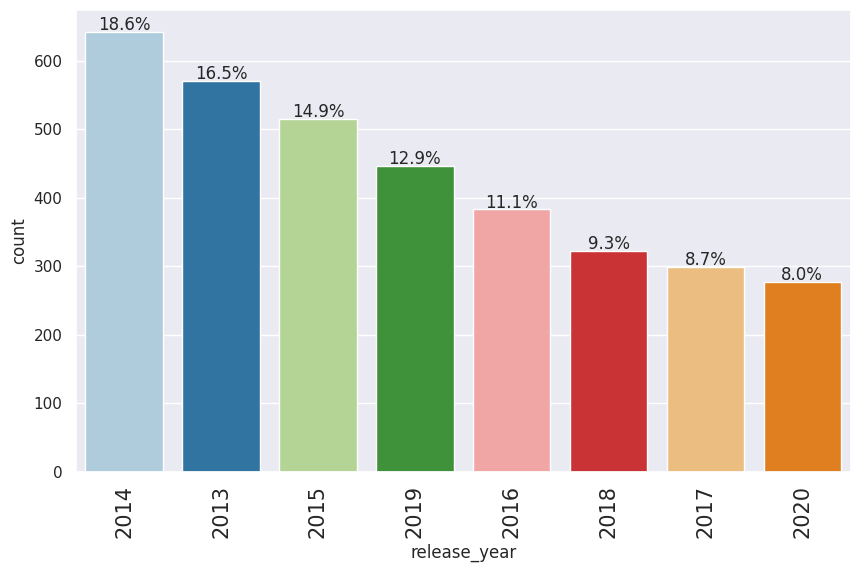

In [ ]:
labeled_barplot(df,"release_year", perc=True)

### Bivariate Analysis

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping release year from list of numerical columns as they are not numerical in nature
num_cols.remove("release_year")

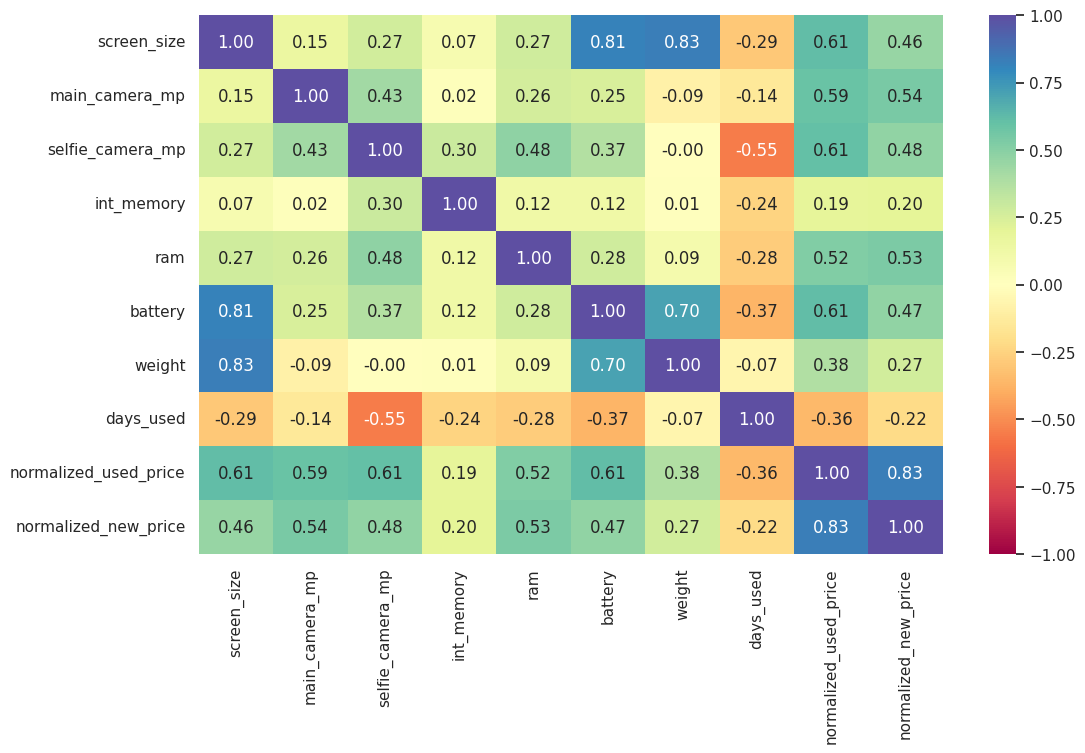

In [ ]:
#  creating heatmap of all numerical columns to check correlation
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### let's check the amount of RAM with different brands as RAM

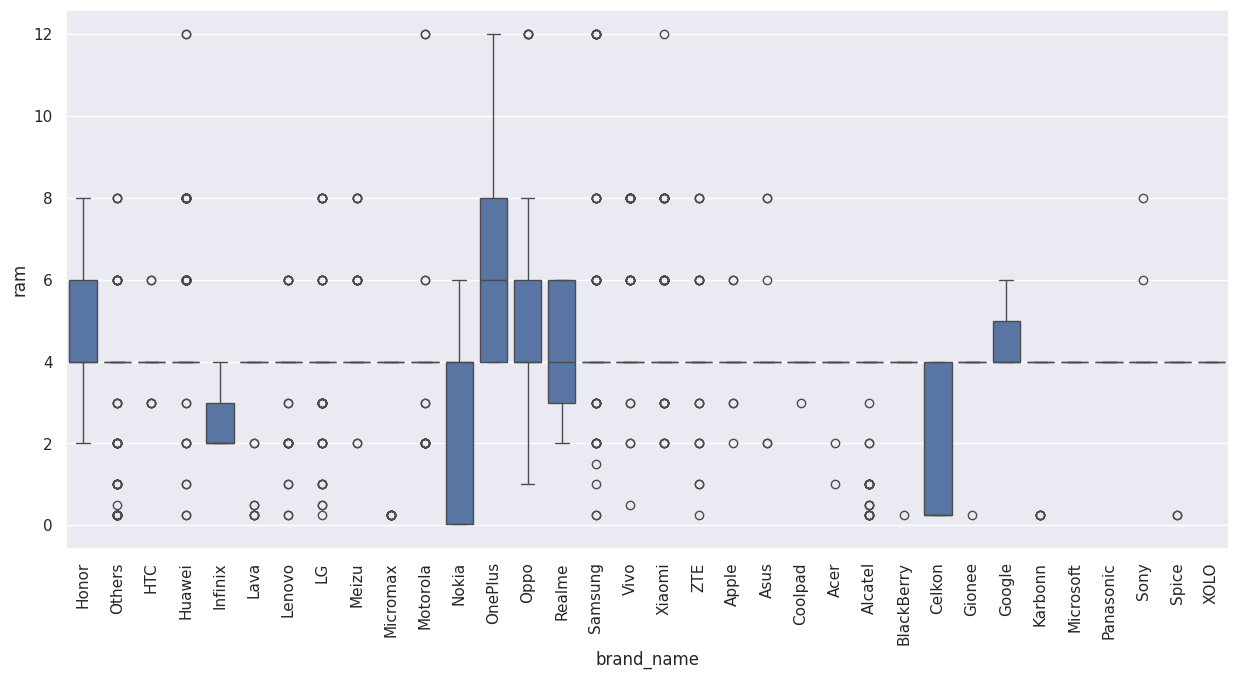

In [ ]:
#let's check the amount of RAM with different brands as RAM
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# let's check the battery size which has longer duration
df_large_battery = df[df['battery']> 4500]
df_large_battery.shape

(341, 15)

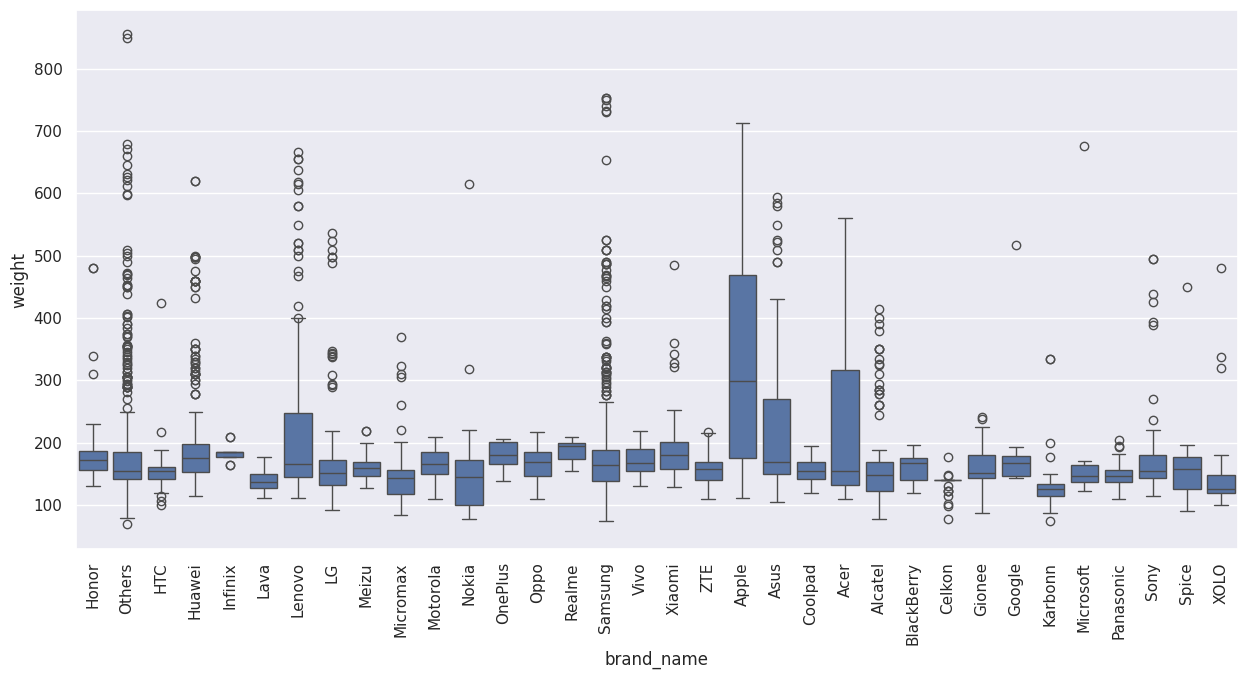

In [ ]:
#let's check the weight with different brands
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# let's check the phones with larger screen
df_large_screen = df[df['screen_size']> 6 *2.54]
df_large_screen.shape

(1099, 15)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


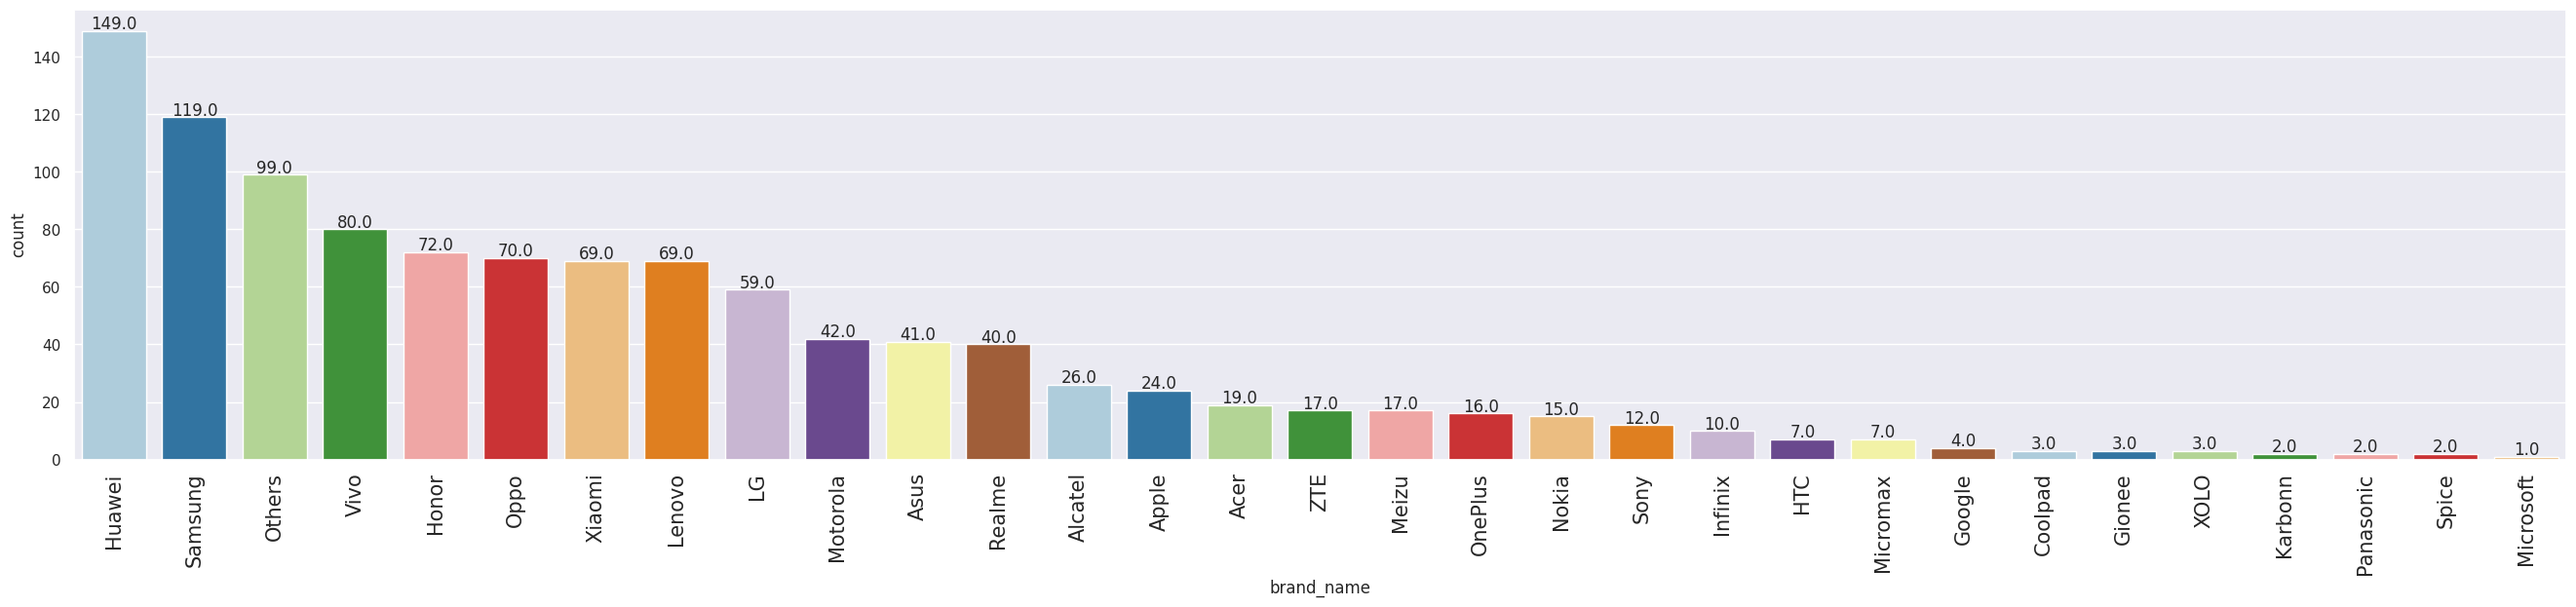

In [ ]:
labeled_barplot(df_large_screen,'brand_name')

In [ ]:
# let's check the selfie camera with higher mega pixel
df_higher_mp_selfiecam = df[df['selfie_camera_mp']>8]
df_higher_mp_selfiecam.shape

(655, 15)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


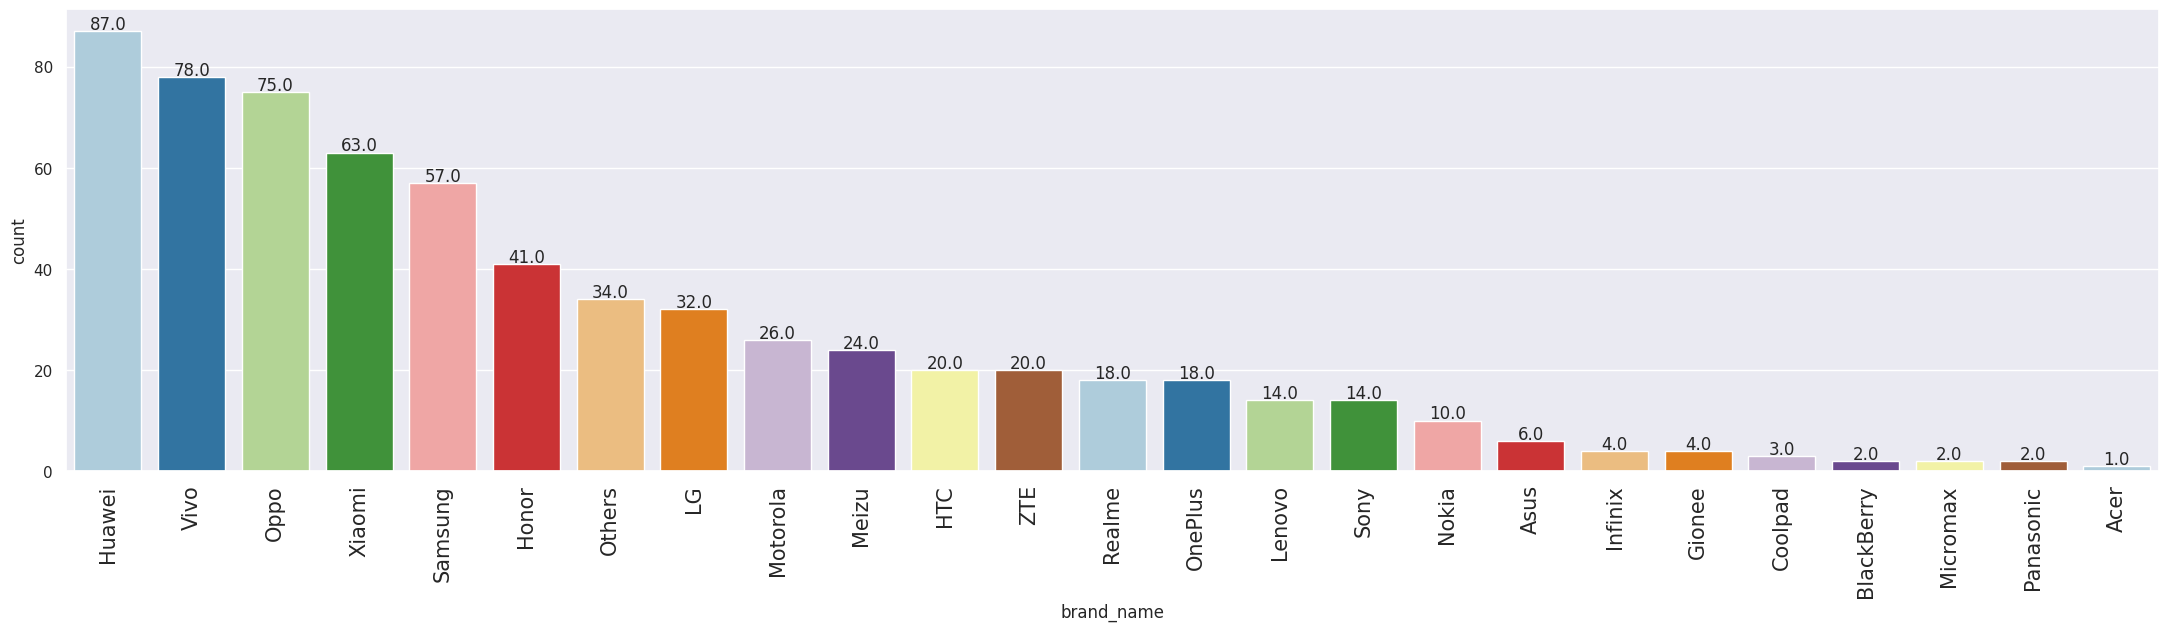

In [ ]:
labeled_barplot(df_higher_mp_selfiecam,'brand_name')

In [ ]:
# let's check the phones whose maincamera has higher mega pixel
df_higher_mp_maincam = df[df['main_camera_mp']>16]
df_higher_mp_maincam.shape

(94, 15)

<ipython-input-75-0aaf8dec4340>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


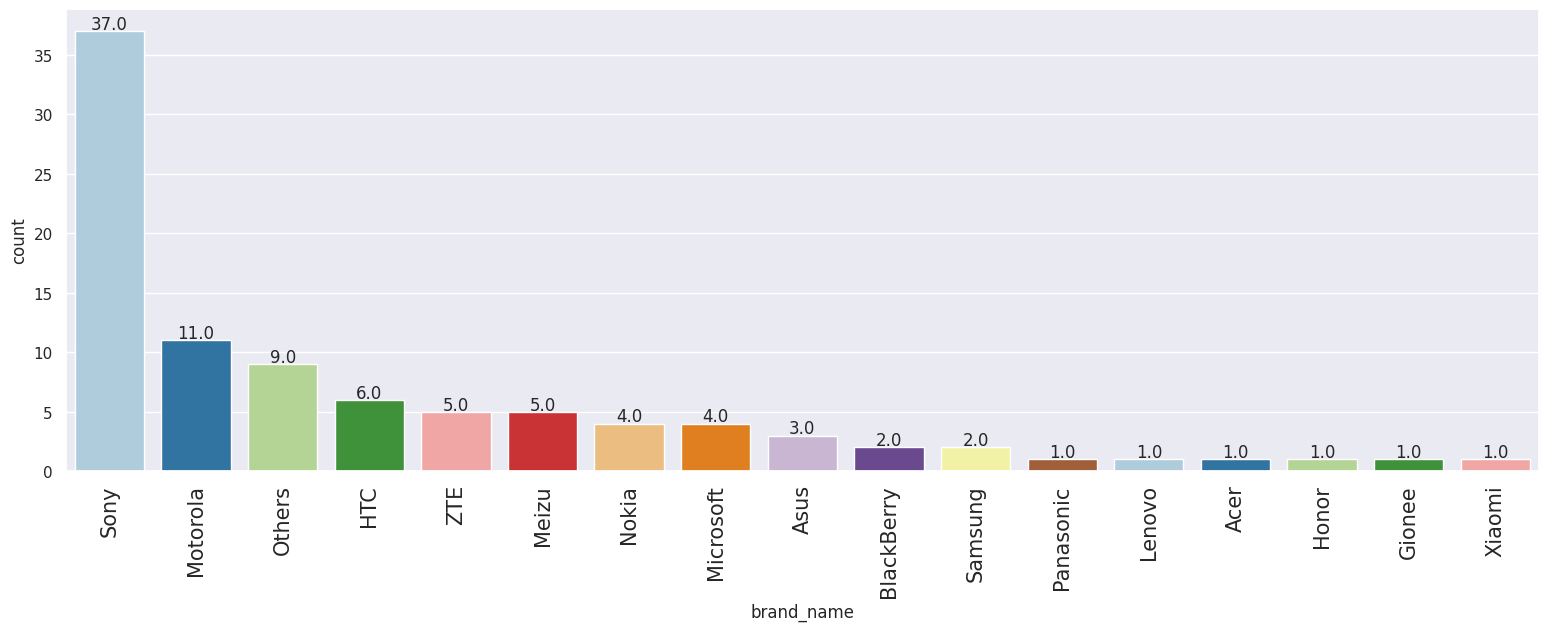

In [ ]:
labeled_barplot(df_higher_mp_maincam,'brand_name')

<Axes: xlabel='normalized_used_price', ylabel='release_year'>

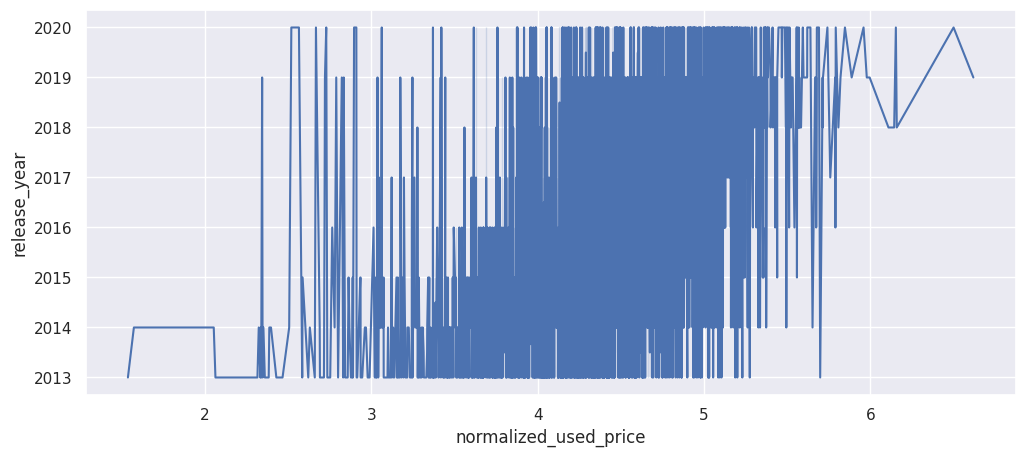

In [ ]:
# let's check the price of used phones/tablets across the years.
plt.figure(figsize=(12,5))
sns.lineplot(data=df,x="normalized_used_price", y="release_year")

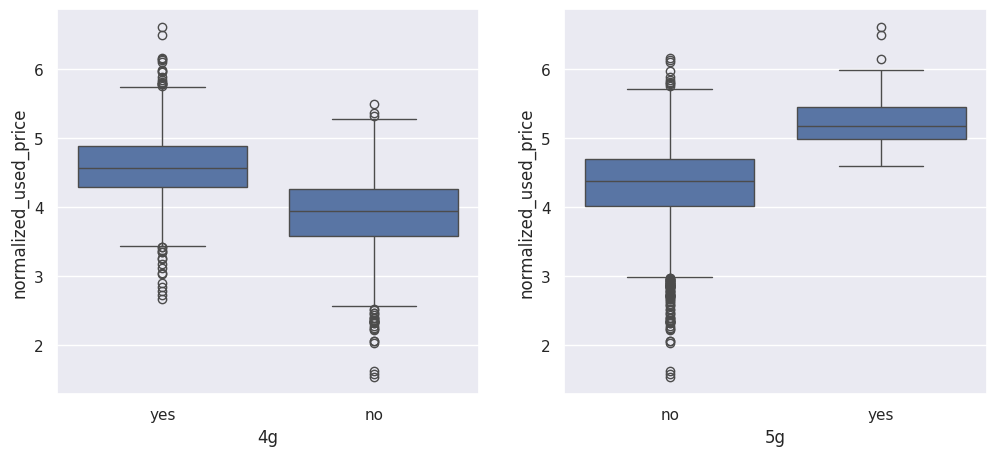

In [ ]:
#let's check the price variation of devices offering 4g and 5g networks
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.boxplot(data=df,x="4g",y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df,x="5g",y="normalized_used_price")
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# let's create a copy of the data
df1 =df.copy()

In [ ]:
# missing value treatment
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["main_camera_mp"].transform("median")
)
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["selfie_camera_mp"].transform("median")
)
df1["int_memory"] = df1["int_memory"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["int_memory"].transform("median")
)
df1["ram"] = df1["ram"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["ram"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["battery"].transform("median")
)
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["release_year", "brand_name"])["weight"].transform("median")
)
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["main_camera_mp"].transform("median")
)
df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["brand_name"])["selfie_camera_mp"].transform("median")
)
df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["brand_name"])["battery"].transform("median")
)
df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name"])["weight"].transform("median")
)
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

- All the missing values have been treated.

### OR

Treating missing value by writing function


In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
for col in cols_impute:
  df1[col] = df1[col].fillna(
      df1.groupby(df1["brand_name"])[col].transform("median")
  )
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All the missing values have been treated.

## Feature Engineering

- Let's create a new feature years_running by taking the base year as 2021
- We will drop the original columns once the new feature is created as the year values themselves are not numerical in nature

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1['years_since_release'].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Detection


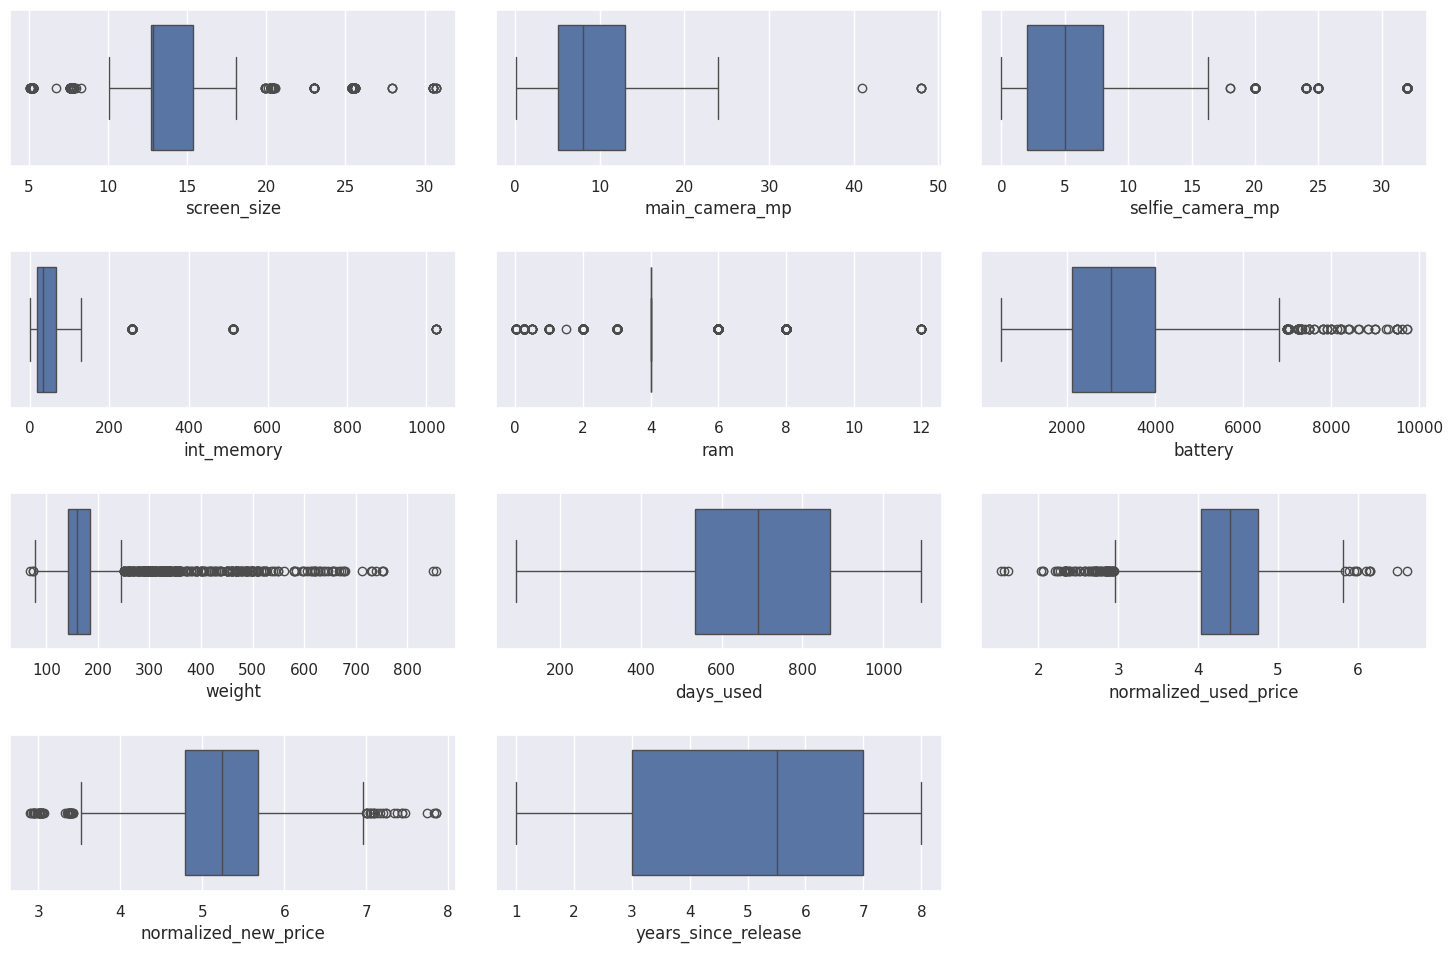

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- There are a few outliers in the data
However, we will not treat them as they are proper values
eling.  


## Data Preparation for Modeling
 * We want to predict the price of a used phone/tablet
 * Before we proceed to build a model, we'll have to encode categorical features
 * We'll split the data into train and test to be able to evaluate the model that we build on the train data
 * We will build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)


In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

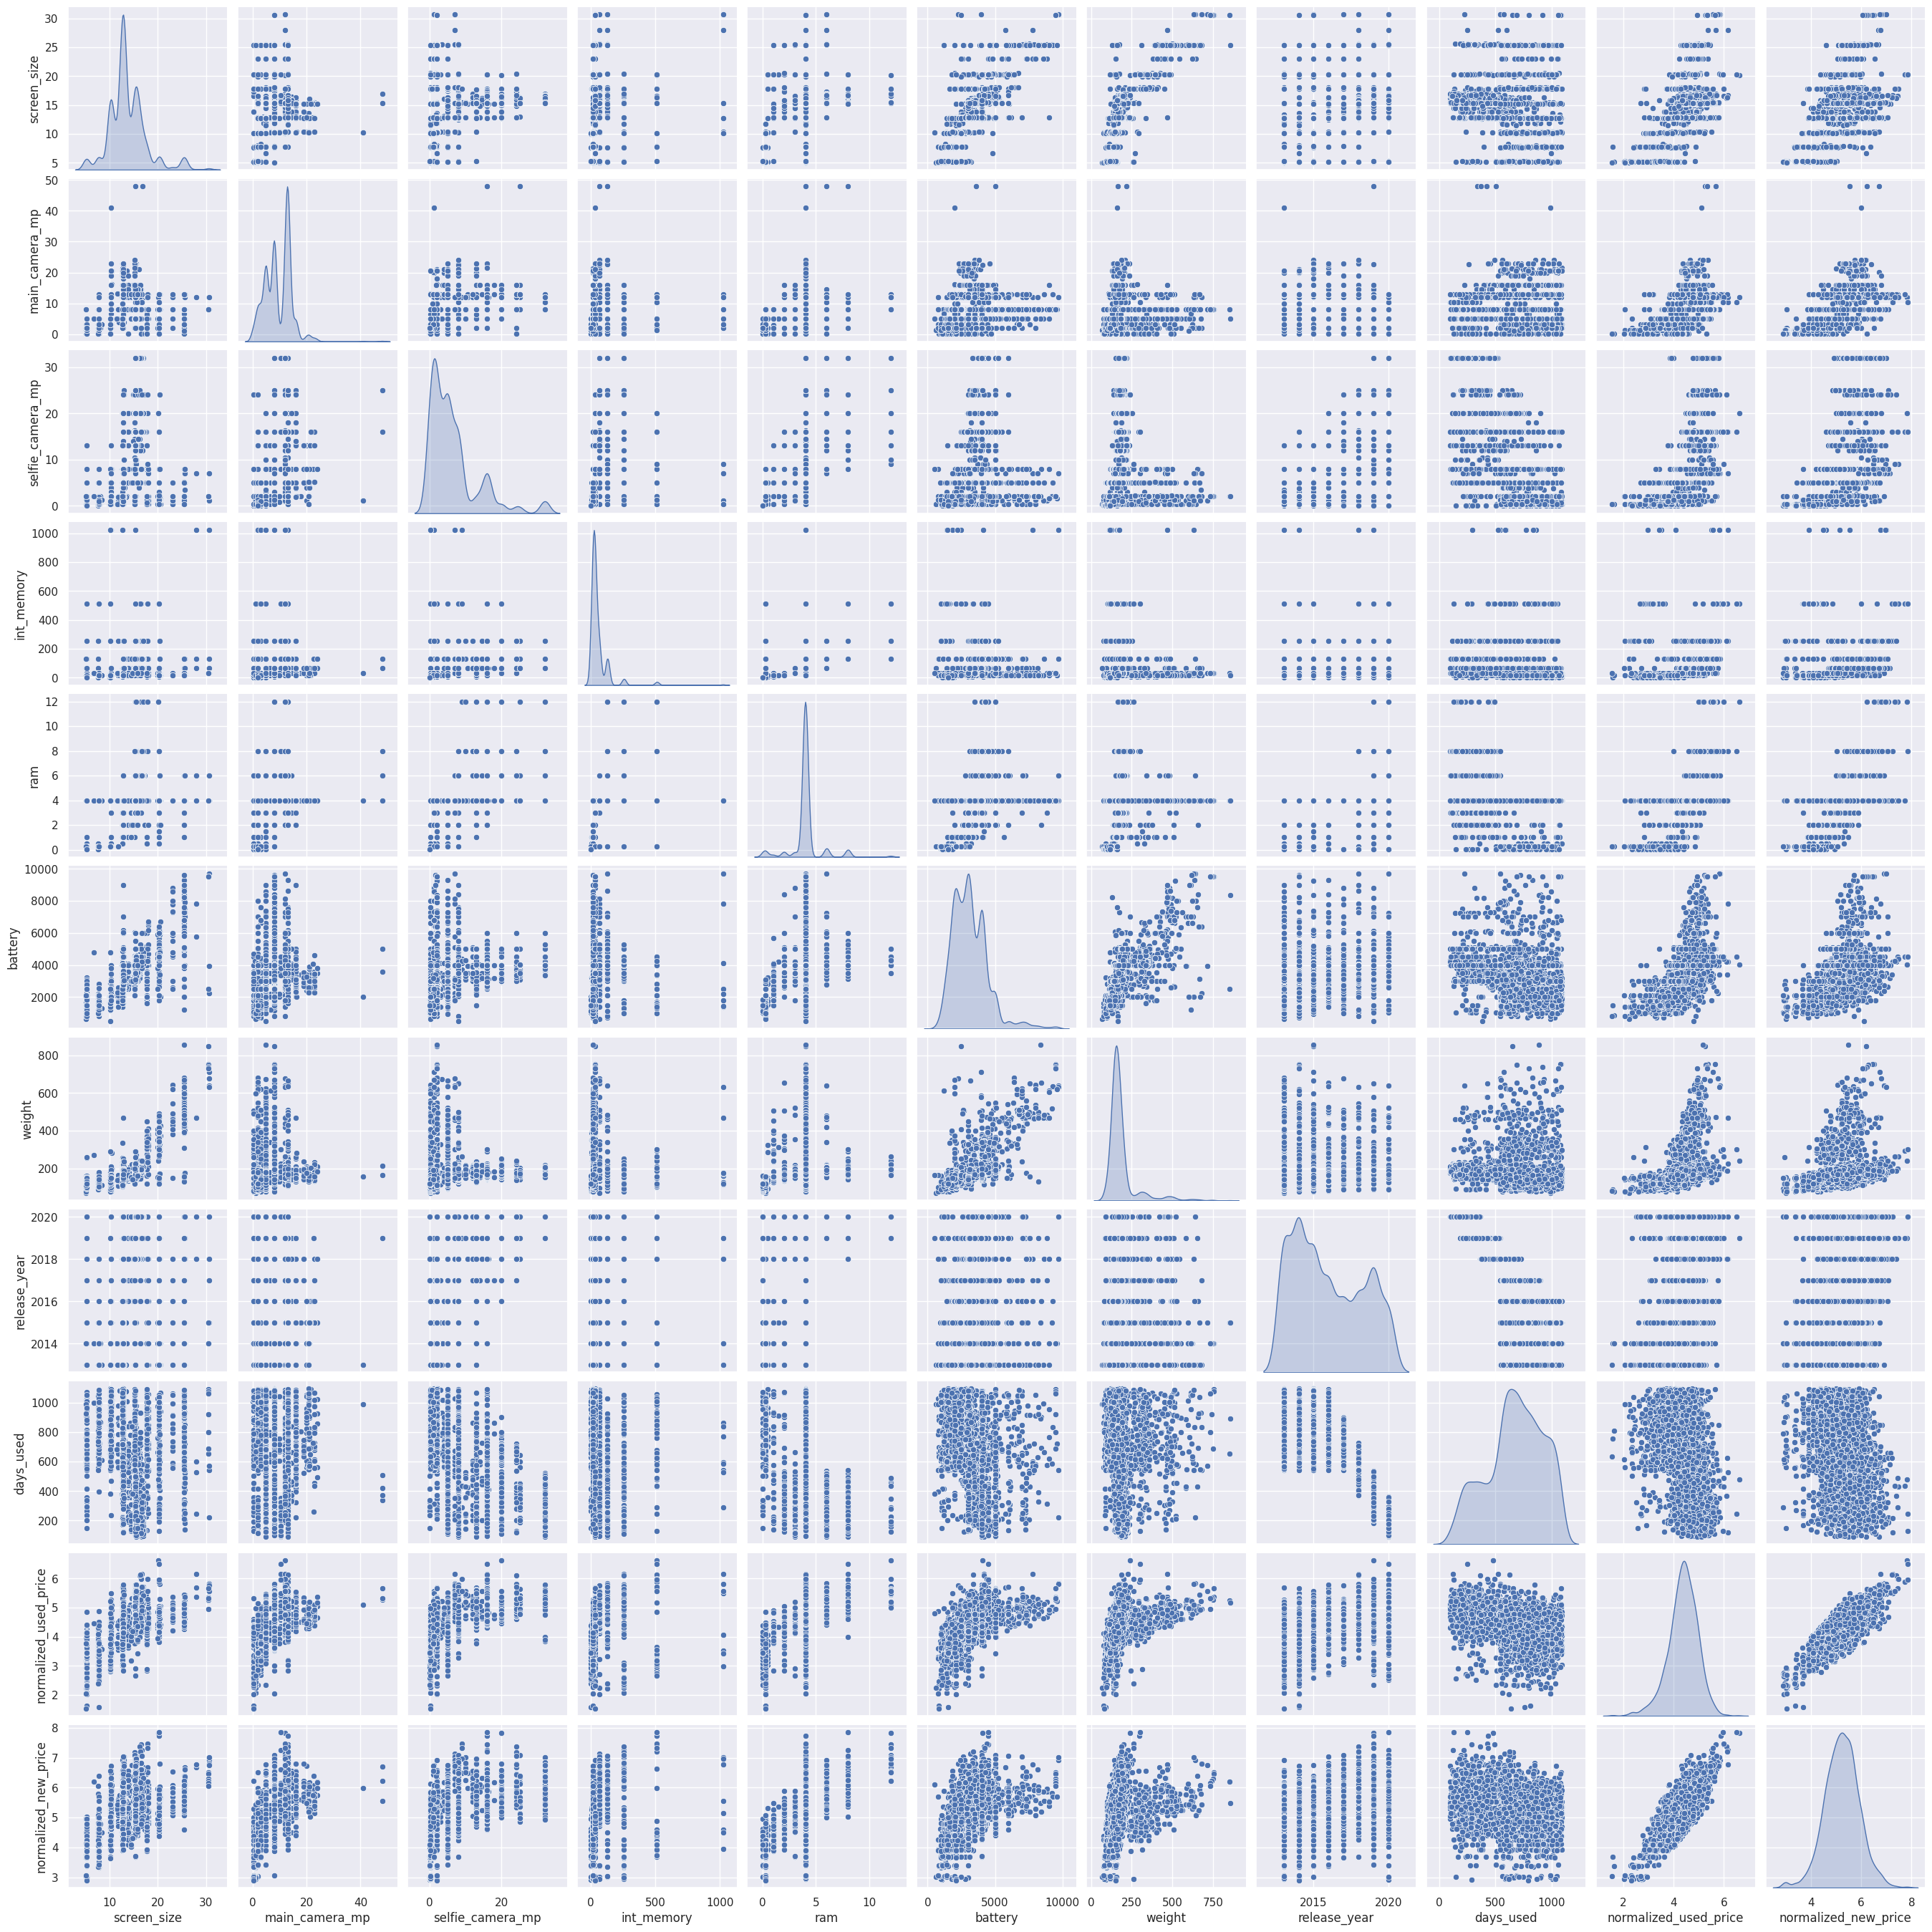

In [ ]:
#bivariate analysis # to plot density curve instead of histogram on the diagonal
df_attr = df.iloc[:,0:15]
sns.pairplot(
 df_attr, diag_kind ="kde")

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train,x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:31:56   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:
Adjusted. R-squared: It reflects the fit of the model.

Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. In our case, the value for adj. R-squared is 0.842, which is good. const coefficient: It is the Y-intercept.

It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient. In our case, the value for const coefficient is 1.3156 Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).

In our case, the coefficient of duration is 0.0123.

## Model Performance Check

### Model Performance Check
Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and R2 .

We will define a function to calculate MAPE and adjusted R2 .

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0. We will create a function which will print out all the above metrics in one go.

In [ ]:
from sklearn.metrics import r2_score
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651



Observations

The training R2
 is 0.84, so the model is not underfitting

The train and test RMSE and MAE are comparable, so the model is not overfitting either

MAE suggests that the model can predict the price of the used devices within a mean error of 0.18 on the test data

MAPE of 4.50 on the test data means that we are able to predict within 4.50% the price of the used devices

Conclusion
We have seen how to build a linear regression model, how to predict the price of the used devices using various factors, and how to check the model's performance.

Next, we have to check the statistical validity of our model. For this, we will check if the model satisfies the assumptions of linear regression. Only then we will be able to make inferences from it.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### we will be checking follow linear regression assumptions:

1. Linearity of variable
2. Indpendence of residuals
3. Homescedasticy
4. Normality of residuals
5. No multicollinearity

### Checking multicollinearity

we will test for multicollinearity using VIF (Variation Inflation Factor)

General Rule of thumb:

 If VIF is 1 then there is no correlation between the k
th predictor and the remaining predictor variables.

 If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.

 If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.


Let's define a function to check VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("Vif values:\n\n{}n".format(vif_series1))

Vif values:

const                    227.744081
screen_size                7.677290
main_camera_mp             2.285051
selfie_camera_mp           2.812473
int_memory                 1.364152
ram                        2.282352
battery                    4.081780
weight                     6.396749
days_used                  2.660269
normalized_new_price       3.119430
years_since_release        4.899007
brand_name_Alcatel         3.405693
brand_name_Apple          13.057668
brand_name_Asus            3.332038
brand_name_BlackBerry      1.632378
brand_name_Celkon          1.774721
brand_name_Coolpad         1.468006
brand_name_Gionee          1.951272
brand_name_Google          1.321778
brand_name_HTC             3.410361
brand_name_Honor           3.340687
brand_name_Huawei          5.983852
brand_name_Infinix         1.283955
brand_name_Karbonn         1.573702
brand_name_LG              4.849832
brand_name_Lava            1.711360
brand_name_Lenovo          4.558941
brand_name_Meiz


There are multiple columns with very high VIF values, indicating presence of strong multicollinearity

We will systematically drop numerical columns with VIF > 5


Removing Multicollinearity To remove multicollinearity

Drop every column one by one that has a VIF score greater than 5.

Look at the adjusted R-squared and RMSE of all these models.

Drop the variable that makes the least change in adjusted R-squared.

Check the VIF scores again.

Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
x_train2 = x_train.drop(["brand_name_Apple"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


On dropping 'brand_name_Apple', there is no change in R-squared and adj R-squared decrease by 0.003 so we can drop it.

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:38:47   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
x_train3 = x_train.drop(["os_iOS"], axis=1)
olsmod_2 = sm.OLS(y_train, x_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


On dropping 'os_iOS', there is no change in R-squared and adj.R-squared decrease by 0.003 so we can drop it.

In [ ]:
x_train4 = x_train.drop(["brand_name_Others"], axis=1)
olsmod_3 = sm.OLS(y_train, x_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


On dropping 'brand_name_others',there is no change in R-squared and adj.R-squared decrease by 0.003 so we can drop it.

In [ ]:
x_train5 = x_train.drop(["screen_size"], axis=1)
olsmod_4 = sm.OLS(y_train, x_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.842 
Adjusted R-squared: 0.838


By dropping 'screen',R-squared reduced by 0.003 and adj.R-squared decreased by 0.007 only so we can drop it.

In [ ]:
x_train6 = x_train.drop(["brand_name_Samsung"], axis=1)
olsmod_5 = sm.OLS(y_train, x_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.845 
Adjusted R-squared: 0.842


By dropping 'brand_name_Samsung',there is no change in R-squared andadj.R-squared decreased by 0.003 only so we can drop it.

In [ ]:
x_train7 = x_train.drop(["weight"], axis=1)
olsmod_6 = sm.OLS(y_train, x_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.841 
Adjusted R-squared: 0.838


By dropping 'weight',R-squared reduced by 0.004 and adj.R-squared decreased by 0.007 only so we can drop it.

In [ ]:
x_train = x_train.drop(["brand_name_Apple"], axis=1)

In [ ]:
olsmod_7 = sm.OLS(y_train, x_train)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:43:16   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Let's check if multicollinearity is still present in the data after dropping column "brand_name_Apple"

In [ ]:
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    227.303871
screen_size                7.643583
main_camera_mp             2.284429
selfie_camera_mp           2.791121
int_memory                 1.364138
ram                        2.273686
battery                    4.079720
weight                     6.394014
days_used                  2.659799
normalized_new_price       3.102417
years_since_release        4.890322
brand_name_Alcatel         3.230773
brand_name_Asus            3.145077
brand_name_BlackBerry      1.561121
brand_name_Celkon          1.731854
brand_name_Coolpad         1.436852
brand_name_Gionee          1.886381
brand_name_Google          1.293163
brand_name_HTC             3.240658
brand_name_Honor           3.160024
brand_name_Huawei          5.581714
brand_name_Infinix         1.265587
brand_name_Karbonn         1.544264
brand_name_LG              4.565534
brand_name_Lava            1.670810
brand_name_Lenovo          4.291839
brand_name_Meizu           2.092837
brand_name_Mic

By dropping "brand_name_Apple" we also reduced the VIF of "os_ios" to 1.90.

In [ ]:
# let's drop brand_name_Others with VIF 9.075
x_train = x_train.drop(["brand_name_Others"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(y_train, x_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     280.6
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:44:02   Log-Likelihood:                 123.83
No. Observations:                   2417   AIC:                            -153.7
Df Residuals:                       2370   BIC:                             118.5
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    150.393434
screen_size                7.570160
main_camera_mp             2.282967
selfie_camera_mp           2.789316
int_memory                 1.363494
ram                        2.270179
battery                    4.079499
weight                     6.368105
days_used                  2.659536
normalized_new_price       3.101340
years_since_release        4.889801
brand_name_Alcatel         1.217774
brand_name_Asus            1.200106
brand_name_BlackBerry      1.124156
brand_name_Celkon          1.174460
brand_name_Coolpad         1.053584
brand_name_Gionee          1.090931
brand_name_Google          1.044521
brand_name_HTC             1.220975
brand_name_Honor           1.280970
brand_name_Huawei          1.500731
brand_name_Infinix         1.062175
brand_name_Karbonn         1.073820
brand_name_LG              1.344248
brand_name_Lava            1.071015
brand_name_Lenovo          1.298082
brand_name_Meizu           1.134618
brand_name_Mic

By dropping "brand_name_Others" we also reduced the VIF of "brand_name_huawei" and "brand_name_Samsung to 1.50 and 1.57 respectively.

Noe let's drop "screen_size" and check. By dropping 'screen',adj.R-squared decreased by 0.003 only so we can drop it.

In [ ]:
# let's drop "screen_size" with VIF 7.57
x_train = x_train.drop(["screen_size"], axis=1)

In [ ]:
olsmod_9 = sm.OLS(y_train, x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.6
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:44:21   Log-Likelihood:                 97.446
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2371   BIC:                             163.5
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
vif_series4 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                    132.560513
main_camera_mp             2.279942
selfie_camera_mp           2.787261
int_memory                 1.361141
ram                        2.270071
battery                    3.832887
weight                     2.988543
days_used                  2.648067
normalized_new_price       3.053912
years_since_release        4.715423
brand_name_Alcatel         1.202265
brand_name_Asus            1.198888
brand_name_BlackBerry      1.124046
brand_name_Celkon          1.172368
brand_name_Coolpad         1.052553
brand_name_Gionee          1.090088
brand_name_Google          1.044378
brand_name_HTC             1.220878
brand_name_Honor           1.265344
brand_name_Huawei          1.490063
brand_name_Infinix         1.061964
brand_name_Karbonn         1.068835
brand_name_LG              1.344171
brand_name_Lava            1.068868
brand_name_Lenovo          1.294032
brand_name_Meizu           1.134220
brand_name_Micromax        1.225974
brand_name_Mic

VIF for all the features is <5

In [ ]:
# let's check year_since_release as it still have VIF - 4.7
x_train8 = x_train.drop(["years_since_release"], axis=1)
olsmod_10 = sm.OLS(y_train, x_train8)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

R-squared: 0.839 
Adjusted R-squared: 0.836


By dropping "years_since_release", R-squared reduced by 0.006 and adj. R-squared decreased by 0.009. so let's not drop it. It might have significance so let's not remove it from training data.

Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [ ]:
# let's check the ols summary again so we can remove the non- significant variable  with p-value greater than 0.05
olsmod_9 = sm.OLS(y_train, x_train)
olsres_9 = olsmod_9.fit()
print(olsres_9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.6
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           21:47:50   Log-Likelihood:                 97.446
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2371   BIC:                             163.5
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


As observed in the above model (olsres_9), there are lots of columns which has a p-value greater than 0.05. So, we can drop it because it is not significant in predicting 'used price of devices'.

In [ ]:
# initial list of columns
predictors = x_train8.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'days_used', 'normalized_new_price', 'brand_name_Honor', 'brand_name_Infinix', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
x_train9 = x_train8[selected_features]
x_test9 = x_test[selected_features]

In [ ]:
olsmod12 = sm.OLS(y_train, x_train9).fit()
print(olsmod12.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     875.6
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           22:01:59   Log-Likelihood:                 57.707
No. Observations:                   2417   AIC:                            -85.41
Df Residuals:                       2402   BIC:                             1.440
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod12_train_perf = model_performance_regression(olsmod12, x_train9, y_train)
olsmod12_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236262,0.184698,0.836159,0.835136,4.440728


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod12_test_perf = model_performance_regression(olsmod12, x_test9, y_test)
olsmod12_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243751,0.188672,0.835271,0.832851,4.606086


After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.842 to 0.835 which is 0.007). This shows that these variables did not have much predictive power.

### TEST FOR LINEARITY AND INDEPENDENCE


Why the test?

Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

How to check linearity and independence?

* Make a plot of fitted values vs residuals.
* If they don't follow any pattern, then we say the model is linear and residuals are independent.
* Otherwise, the model is showing signs of non-linearity and residuals are not independent.

How to fix if this assumption is not followed?

We can try to transform the variables and make the relationships linear.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod12.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod12.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855511,0.231976
1525,4.448399,4.658170,-0.209771
1128,4.315353,4.330420,-0.015068
3003,4.282068,4.201580,0.080488
2907,4.456438,4.510997,-0.054559


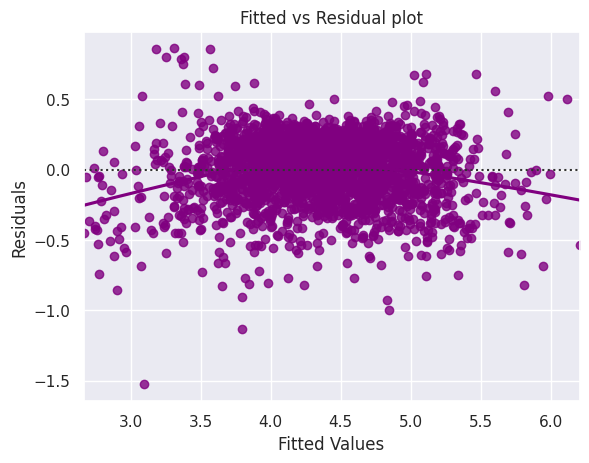

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.  #copied rewrite

### TEST FOR NORMALITY


Why the test?

Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.
How to check normality?

The shape of the histogram of residuals can give an initial idea about the normality.
It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
Other tests to check for normality includes the Shapiro-Wilk test.
Null hypothesis: Residuals are normally distributed
Alternate hypothesis: Residuals are not normally distributed
How to fix if this assumption is not followed?

We can apply transformations like log, exponential, arcsinh, etc. as per our data.

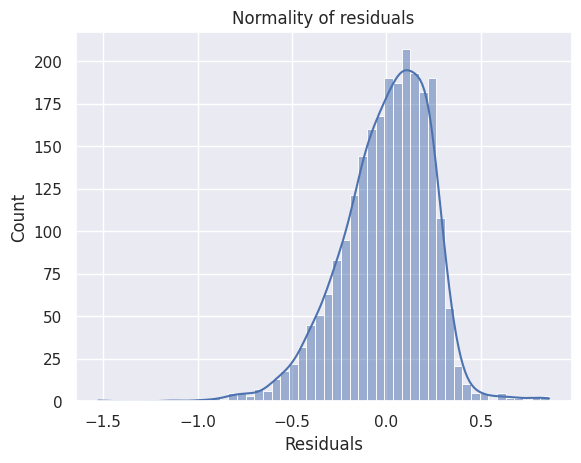

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals does have a bell shape.

Let's check the Q-Q plot.

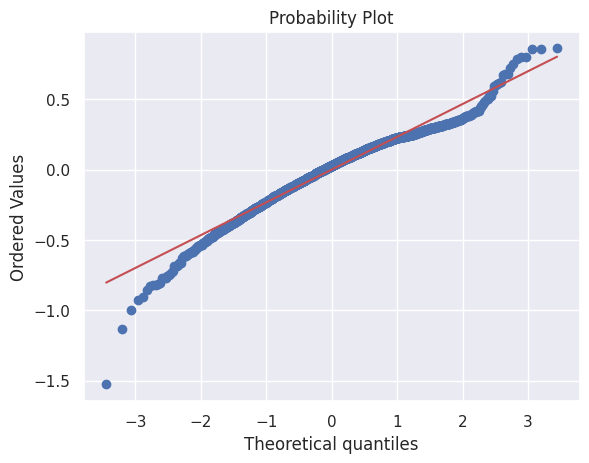

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals more or less follow a straight line except for the tails.

Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.970433235168457, pvalue=6.400345835468585e-22)


Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

Strictly speaking, the residuals are not normal.

However, as an approximation, we can accept this distribution as close to being normal.

So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY


Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

Why the test?

The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.
How to check for homoscedasticity?

* The residual vs fitted values plot can be looked at to check for homoscedasticity.
*  In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic.
* Otherwise, they are heteroscedastic.
    * Null hypothesis: Residuals are homoscedastic
    * Alternate hypothesis: Residuals have heteroscedasticity
How to fix if this assumption is not followed?

Heteroscedasticity can be fixed by adding other important features or making transformations.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train9)
lzip(name, test)

[('F statistic', 1.0162458020411484), ('p-value', 0.39038493075871056)]

Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred = olsmod12.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.379607
2341,3.696103,3.977533
1913,3.592093,3.666967
688,4.306495,4.157264
650,4.522115,5.143025
2291,4.259294,4.411554
40,4.997685,5.410455
1884,3.875359,4.001124
2538,4.206631,4.051782
45,5.380450,5.228407


We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train9.copy()
x_test_final = x_test9.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.836
Model:                               OLS   Adj. R-squared:                  0.835
Method:                    Least Squares   F-statistic:                     875.6
Date:                   Sat, 24 Feb 2024   Prob (F-statistic):               0.00
Time:                           01:22:25   Log-Likelihood:                 57.707
No. Observations:                   2417   AIC:                            -85.41
Df Residuals:                       2402   BIC:                             1.440
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236262,0.184698,0.836159,0.835136,4.440728


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243751,0.188672,0.835271,0.832851,4.606086


## Actionable Insights and Recommendations

-


___